In [86]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv("WineQT.csv")

## Memisahkan Atribut X dan y

In [88]:
X = df.drop(['quality', 'Id'], axis=1)
y = df['quality']

## Split Dataset Menjadi train dan set

In [89]:
# Split dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Melakukan Preprocessing dengan Normalisasi

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Membuat Model Dengan Sequential Model

### Dan Output Layer Target Saya Adalah Kontinue -> Menggunakan Linear

In [91]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear') 
])

## Compile Model Dengan Adam, MAE 

In [92]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

## Latih Model 

In [93]:

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100


29/29 [==============================] - 1s 8ms/step - loss: 30.9368 - mean_squared_error: 30.9368 - val_loss: 27.2002 - val_mean_squared_error: 27.2002
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 19.7876 - mean_squared_error: 19.7876 - val_loss: 8.2085 - val_mean_squared_error: 8.2085
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 4.5987 - mean_squared_error: 4.5987 - val_loss: 3.1107 - val_mean_squared_error: 3.1107
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 2.2940 - mean_squared_error: 2.2940 - val_loss: 2.3178 - val_mean_squared_error: 2.3178
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 1.7654 - mean_squared_error: 1.7654 - val_loss: 2.0188 - val_mean_squared_error: 2.0188
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.5578 - mean_squared_error: 1.5578 - val_loss: 1.8114 - val_mean_squared_error: 1.8114
Epoch 7/100
29/29 [=====================

## Evaluasi Model Dengan r2_score

In [94]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

8/8 [==============================] - 0s 888us/step


## Grafik Loss

Text(0.5, 1.0, 'Grafik Loss')

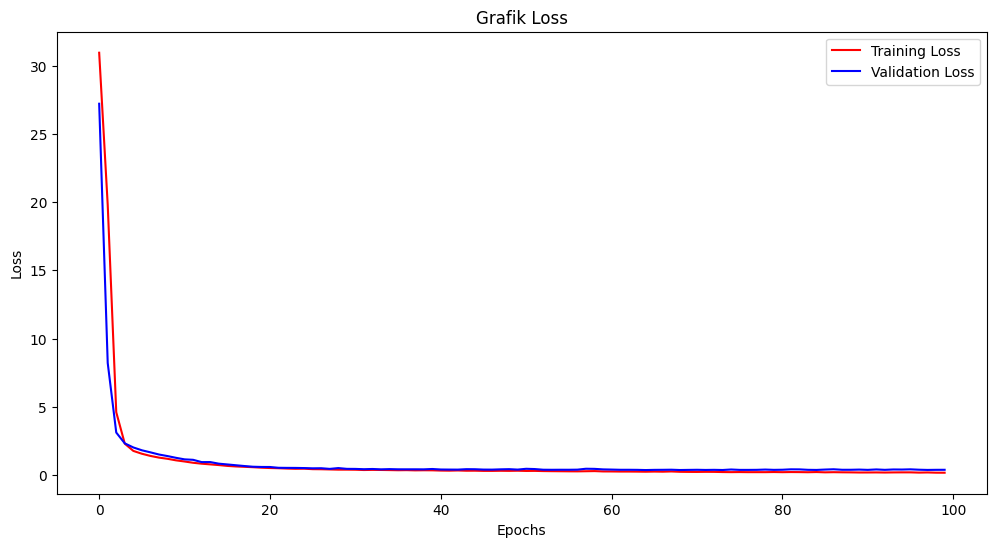

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Grafik Loss')

## Grafik MAE (ERROR)

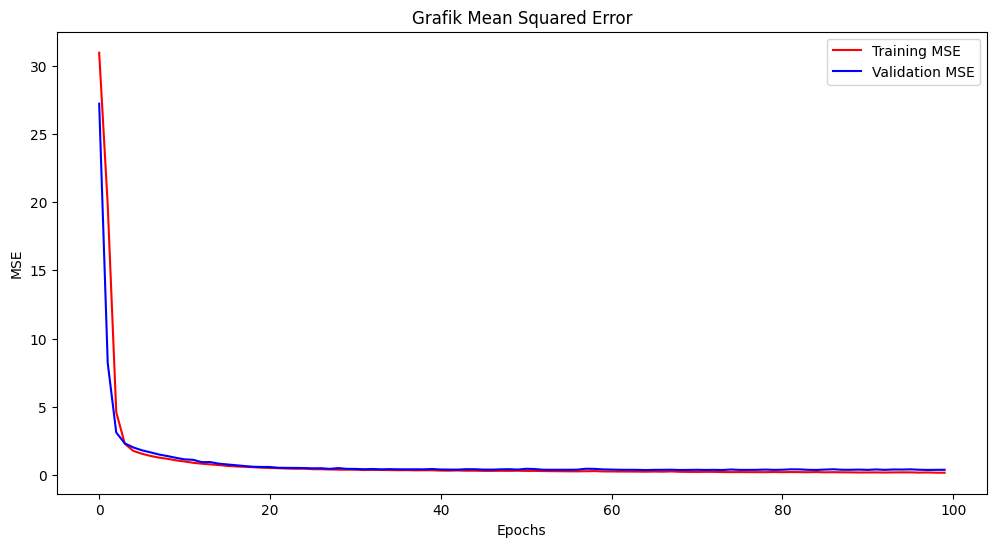

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_squared_error'], label='Training MSE',color="red")
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE', color="blue")
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('Grafik Mean Squared Error')
plt.show()

## Output Nilai dengan R2_SCORE

In [97]:
# Output nilai r2_score
print("R2 Score: ", r2)

R2 Score:  0.31379573136048033
